In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
print(data.shape)
data.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Also, we can see there are columns inside the dataset where there are NaN entries or missing values like 'Age','Cabin','Embarked'. So, we need to apply data preprocessing to get rid of these features.

### Data Preprocessing

 - Dropping not useful columns/features
 - Filling the missing values (Data Imputation)

In [5]:
# columns that can be dropped
drop_columns = ["PassengerId","Name","Ticket","Cabin","Embarked"]

In [6]:
cleaned_data = data.drop(drop_columns,axis=1) # dropped the features along the columns i.e., axis=1
cleaned_data.shape

(891, 7)

In [7]:
cleaned_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


Now, we can see we are left with less number of features that can be more relevant for making predictions.
Also, 'Sex' column in the dataset contains string values which we need to convert into numerical data. So, we will use LabelEncoder to encode into numerical data. 

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
cleaned_data["Sex"]=le.fit_transform(cleaned_data["Sex"])

In [12]:
cleaned_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,NaN,0,0,8.4583
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708


Although, we have converted string into numerical type. It can still be observed that 'Age' column still has a lot of NaN values, so we need to fill those centers with the mean value of the age column. 

In [13]:
cleaned_data = cleaned_data.fillna(cleaned_data["Age"].mean())
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


We can now notice 'Age' column now also has 891 values.

###### Dividing our dataset into X (features) and Y (labels)

In [14]:
X = cleaned_data.iloc[:,1:]
Y = cleaned_data.iloc[:,0]
print(X.shape)
print(Y.shape)

(891, 6)
(891,)


Also Splitting data for testing purpose

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.20)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=3)

In [30]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=3)

In [31]:
rfc.score(X_train,Y_train)

0.9620786516853933

In [32]:
rfc.score(X_val,Y_val)

0.7988826815642458

We can observe here that our model is getting higher accuracy on the training dataset but we are checking our accuracy on the validation set we can see accuracy is pretty low. This is because of overfitting.
To avoid this overfitting one method is to limit the depth of our random forests.

##### Effect of maximum depth of the trees on the accuracy of the classifier

In [33]:
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5,random_state=3)

In [34]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       random_state=3)

In [35]:
rfc.score(X_train,Y_train)

0.8441011235955056

In [36]:
rfc.score(X_val,Y_val)

0.8379888268156425

Here, now we can notice our training and validation accuracy is quite comparable and thus we can avoid overfitting by making a restriction on the maximum depth of the tree.

##### Effect of number of trees inside a forest (n_estimators) on the accuracy of the classifier

In [51]:
rfc = RandomForestClassifier(n_estimators=1,criterion='entropy',max_depth=5,random_state=3)
rfc.fit(X_train,Y_train)
rfc.score(X_train,Y_train)

0.7542134831460674

In [52]:
rfc = RandomForestClassifier(n_estimators=2,criterion='entropy',max_depth=5,random_state=3)
rfc.fit(X_train,Y_train)
rfc.score(X_train,Y_train)

0.8188202247191011

In [53]:
rfc = RandomForestClassifier(n_estimators=3,criterion='entropy',max_depth=5,random_state=3)
rfc.fit(X_train,Y_train)
rfc.score(X_train,Y_train)

0.827247191011236

In [38]:
rfc = RandomForestClassifier(n_estimators=5,criterion='entropy',max_depth=5,random_state=3)
rfc.fit(X_train,Y_train)
rfc.score(X_train,Y_train)

0.8356741573033708

In [39]:
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5,random_state=3)
rfc.fit(X_train,Y_train)
rfc.score(X_train,Y_train)

0.8441011235955056

In [40]:
rfc = RandomForestClassifier(n_estimators=15,criterion='entropy',max_depth=5,random_state=3)
rfc.fit(X_train,Y_train)
rfc.score(X_train,Y_train)

0.8398876404494382

So, as we increase the number of trees inside the forest accuracy increase at first and later on it reached to a saturation state. We can visualise this using a graph as shown below.

##### Visualising the n_estimators w.r.t accuracy

In [54]:
acc_list = []
for i in range(1,50,1):
    rfc = RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=5,random_state=3)
    rfc.fit(X_train,Y_train)
    accuracy = rfc.score(X_train,Y_train)
    acc_list.append(accuracy)

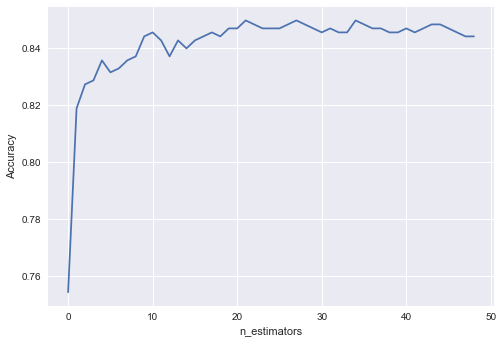

In [58]:
plt.style.use('seaborn')
plt.plot(acc_list)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

In [61]:
# value of n_estimators that gave highest accuracy
index = np.argmax(acc_list)
n_estimator = index+1
print(n_estimator)

22


In [62]:
# Checking accuracy at this value
rfc = RandomForestClassifier(n_estimators=n_estimator,criterion='entropy',max_depth=5,random_state=3)
rfc.fit(X_train,Y_train)
rfc.score(X_train,Y_train)

0.8497191011235955

In [63]:
rfc.score(X_val,Y_val)

0.8379888268156425